In [17]:
# Part A.

#import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# a. read data from file
dataset = pd.read_csv('Housing-Data-one-zip-3.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

# b. convert categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0,1,2,3,4])])
x = np.array(ct.fit_transform(x))
# print(x)

# c. transform some data.

# age = dataset.iloc[:,12].values
# age = 2020 - age
# x[:,12] = age

dataset['yr_built'] = 2020- dataset['yr_built']
print(dataset['yr_built'])

# print(x[:,12])


# d. divide set into training set and test set
x1 = dataset.iloc[:, 13].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 0)

# print(x)

0      59
1      42
2      52
3      66
4      65
       ..
356    34
357     7
358     6
359     6
360    15
Name: yr_built, Length: 361, dtype: int64


0.36510483113589653


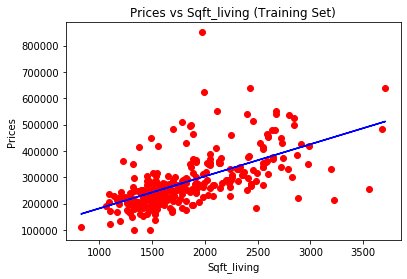

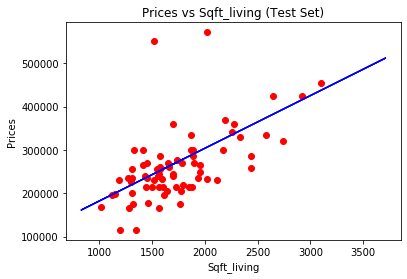

4500 for Sqft_living with house price:  [608165.7936051]
2870 for Sqft_living with house price:  [409651.97175244]
750 for Sqft_living with house price:  [151462.21572321]


In [69]:
# Part B: predict house price using Sqft_living as independent variable.
x_train = np.reshape(x_train, (-1, 1))
x_test = np.reshape(x_test, (-1, 1))

# a. print Rsquare
print('R-sqaure',regressor.score(x_train,y_train))

# b. plot the linear regression line for the training data set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Prices vs Sqft_living (Training Set)')
plt.xlabel('Sqft_living')
plt.ylabel('Prices')
plt.show()

# c. plot the linear regression line for the test data set
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Prices vs Sqft_living (Test Set)')
plt.xlabel('Sqft_living')
plt.ylabel('Prices')
plt.show()

# d. predicting house prices for the following Sqft of living
print('4500 for Sqft_living with house price: ',regressor.predict([[4500]]))
print('2870 for Sqft_living with house price: ',regressor.predict([[2870]]))
print('750 for Sqft_living with house price: ',regressor.predict([[750]]))



In [57]:
# Part C: Multiple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Housing-Data-one-zip-3.csv')

x = dataset.iloc[:, 5:15].values
y = dataset.iloc[:,-1].values


# x_train = np.reshape(x_train, (-1, 1))
# x_test = np.reshape(x_test, (-1, 1))

dataset['yr_built'] = 2020 - dataset['yr_built']
# print(dataset['yr_built'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# a. print Rsquare
print('R-sqaure',regressor.score(x_train,y_train))

# b. predicted values.
print(regressor.predict([[3,0.75,2510,20000,2.0,2510,0,59,2130,20000]]))
print(regressor.predict([[4, 2.25, 1500, 5393, 2.0, 1500, 0, 21, 1500, 5952]]))
print(regressor.predict([[4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]]))
print(regressor.predict([[4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]]))


R-sqaure 0.7677356902180331
[-863406.17389665]
[-1035485.00860859]
[-911046.22743338]
[-636168.21607925]
[-598291.59436387]
[-746346.49459424]
[-938908.69612085]


In [50]:
# Part D. Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x,y)


# a. print Rsquare
print('R-sqaure',regressor.score(x,y))

# b. predicted values.

print(regressor.predict([[3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]]))
print(regressor.predict([[4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]]))
print(regressor.predict([[4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]]))
print(regressor.predict([[4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]]))

R-sqaure 0.9950486495433811
[465000.]
[215000.]
[250000.]
[637000.]
[637000.]
[535000.]
[194820.]


In [51]:
# Part E. Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,  random_state = 0)
regressor.fit(x,y)


# a. print Rsquare
print('R-sqaure',regressor.score(x,y))

# b. predicted values.

print(regressor.predict([[3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]]))
print(regressor.predict([[4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]]))
print(regressor.predict([[4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]]))
print(regressor.predict([[4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]]))
print(regressor.predict([[4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]]))

R-sqaure 0.9463739817261827
[390750.]
[209070.]
[300300.]
[594180.]
[594180.]
[502140.]
[284720.]
